# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Gautam Ghai <br>
Roll Number: 2020101020

In [1]:
# Installing Pillow Libraries
#pip install scikit-learn matplotlib Pillow

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


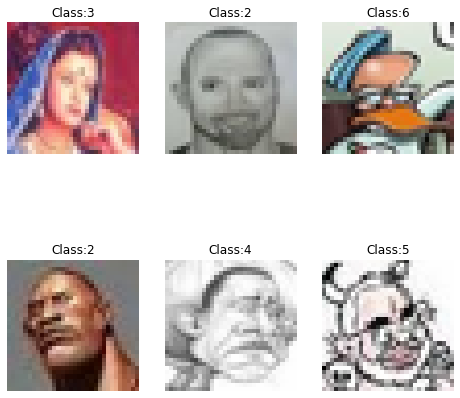

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [7]:
# write function
import numpy as np
    
def eigen(X):
    eigenvalues,eigenvectors = np.linalg.eig(X)
    return eigenvalues,eigenvectors

#### Compute eigen values and plot eigen value spectrum

/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


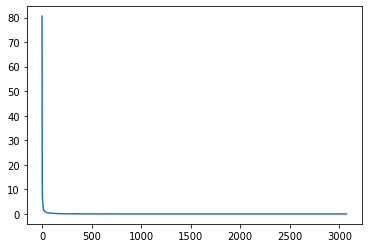

In [8]:
X=X.reshape(N,H*W*C)
mean=np.mean(X,axis=0)
X=X-mean
cov=np.cov(X.T)
eigenvalues,eigenvectors=eigen(cov)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

plt.plot(eigenvalues)
plt.show()

#### Plot the percentage of variances vs the number of principal components

/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


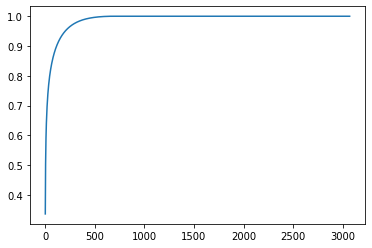

In [9]:
# plot variance vs components
variance=np.cumsum(eigenvalues)/np.sum(eigenvalues)
plt.plot(variance)
plt.show()


#### Visualize eigen faces(eigen vectors)

/tmp/ipykernel_7403/507264469.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  ele=np.array(ele,dtype=np.float32)


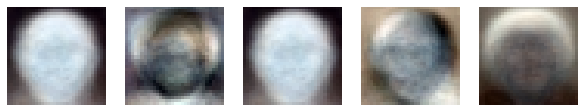

In [10]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eig_vecs,H,W,C, indices)
"""
def plot(image,H,W,C,indices):
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        ele=np.array(ele,dtype=np.float32)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eigenvectors,H,W,C, indices)


#### Reconstruction 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


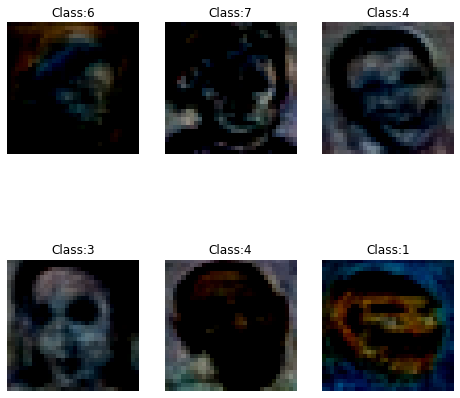

In [11]:
# reconstruction
def reconstruct(X,eig_vecs):
    return np.dot(np.dot(X,eig_vecs),eig_vecs.T)
recx = reconstruct(X,eigenvectors[:,0:100])
pl = recx.reshape(-1,H,W,C)

ind = np.random.randint(0,y.shape[0],6)
display_images(pl[ind,...].real,y[ind], row=2,col=3)


#### Plot data in 2D

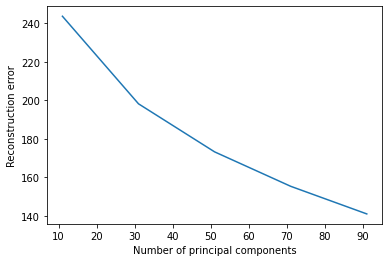

/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


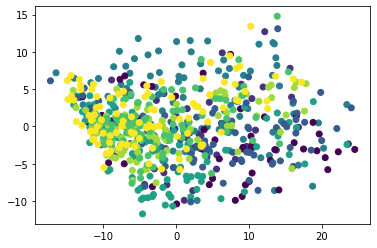

In [12]:
def frobenius_norm(X):
    return np.linalg.norm(X,ord='fro')

def reconstruction_error(X,eig_vecs):
    return frobenius_norm(X-reconstruct(X,eig_vecs))

error=[]
components=[]
for i in range(11,101,20):
    error.append(reconstruction_error(X,eigenvectors[:,0:i]))
    components.append(i)
plt.xlabel('Number of principal components')
plt.ylabel('Reconstruction error')
plt.plot(components,error)
plt.show()

plt.scatter(np.dot(X,eigenvectors[:,0]),np.dot(X,eigenvectors[:,1]),c=y)


plt.show()

By using just about 100 principal components we can construct the images with very less reconstruction error. 

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [13]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

In [14]:


X_class=[]
for i in range(0,8):
    X_class.append(X[y==i])

for i in range(0,8):
    X_class[i]=X_class[i].reshape(X_class[i].shape[0],H*W*C)

eigenvalues_class=[]
eigenvectors_class=[]
for i in range(0,8):
    mean=np.mean(X_class[i],axis=0)
    X_class[i]=X_class[i]-mean
    cov=np.cov(X_class[i].T)
    eigen_values,eigen_vectors=eigen(cov)
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    eigenvalues_class.append(eigen_values)
    eigenvectors_class.append(eigen_vectors)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gautam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

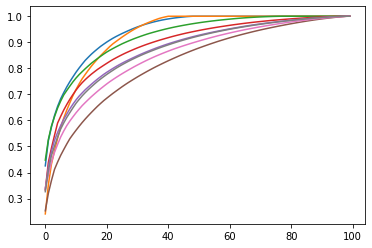

In [15]:
# components required

for i in range(0,8):
    variance=np.cumsum(eigenvalues_class[i])/np.sum(eigenvalues_class[i])
    plt.plot(variance[0:100])
plt.show()

#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

In [16]:
# observation/analysis

keys=list(cfw_dict.keys())
for i in range(0,8):
    variance=np.cumsum(eigenvalues_class[i])/np.sum(eigenvalues_class[i])
    print(keys[i],np.where(variance>0.9)[0][0]+1)
    
variance=np.cumsum(eigenvalues)/np.sum(eigenvalues)
print('For entire dataset',np.where(variance>0.9)[0][0]+1)


Amitabhbachan 21
AamirKhan 24
DwayneJohnson 28
AishwaryaRai 36
BarackObama 43
NarendraModi 57
ManmohanSingh 50
VladimirPutin 44
For entire dataset 115


No, because the greater the number of samples, more number of components are required.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [17]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [18]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plots=[]
comps=[]
for i in range(1,201,10):
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, label, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(i,reg.score(X_test, y_test))
    plots.append(reg.score(X_test,y_test))
    comps.append(i)


1 0.6262393032932719
11 0.7913298957393082
21 0.8319135601952055
31 0.8624341036921794
41 0.8745403863897618
51 0.884720601876217
61 0.8986279742568746
71 0.9057427443886974
81 0.9050872389127099
91 0.9027088021849499
101 0.9117725153135458
111 0.9135545085404544
121 0.9118592276438835
131 0.9150618695610413
141 0.9149747251766462
151 0.9090664610770913
161 0.9165026511447317
171 0.9078513063457717
181 0.9171160731460518
191 0.9243925929331502


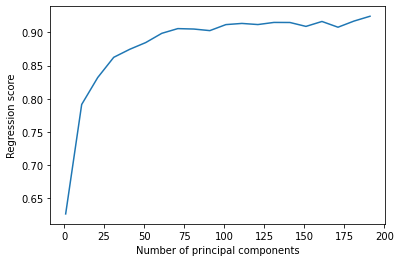

In [19]:
# analysis / plot (split the cells if required)

plt.xlabel('Number of principal components')
plt.ylabel('Regression score')
plt.plot(comps,plots)


We see that the score increases with the number of principal components. However, the score increases steeply at first and then gradually increases. This is because the first few principal components capture most of the variance in the data.